#  Predictive Maintenance for Manufacturing
Implementing a predictive maintenance system for a manufacturing plant to reduce downtime and maintenance costs by predicting equipment failures before they occur.

## importing the required libraries

In [1]:
import os

In [2]:
%pwd

'c:\\Users\\smith\\PycharmProjects\\End-to-End-Data-Science-Project-Using-MLOPS\\research'

In [3]:
os.chdir("../")

In [4]:
%pwd

'c:\\Users\\smith\\PycharmProjects\\End-to-End-Data-Science-Project-Using-MLOPS'

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve, auc

## loading the dataset

In [2]:
data = pd.read_csv('/kaggle/input/predictive-maintenance-dataset-ai4i-2020/ai4i2020.csv')

## data exploration

In [3]:
# top 5 rows
data.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [4]:
# bottom 5 rows
data.tail()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0
9999,10000,M24859,M,299.0,308.7,1500,40.2,30,0,0,0,0,0,0


In [5]:
# information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [6]:
# rows and columns in dataset
rows, cols = data.shape
print(f"number of rows: {rows}\nnumber of columns: {cols}")

number of rows: 10000
number of columns: 14


In [7]:
# statistical information of numerical data
data.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [8]:
# checking null values
data.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [9]:
# checking duplicates
data.duplicated().sum()

0

In [10]:
# exploring categorical feature: Product ID
data['Product ID']

0       M14860
1       L47181
2       L47182
3       L47183
4       L47184
         ...  
9995    M24855
9996    H39410
9997    M24857
9998    H39412
9999    M24859
Name: Product ID, Length: 10000, dtype: object

In [11]:
# exploring categorical feature: Type
# category of product type - (L, M, H)
low, med, high = data['Type'].value_counts()
print(f"Low quality product: {low}\nMedium quality product: {med}\nHigh quality product: {high}")

Low quality product: 6000
Medium quality product: 2997
High quality product: 1003


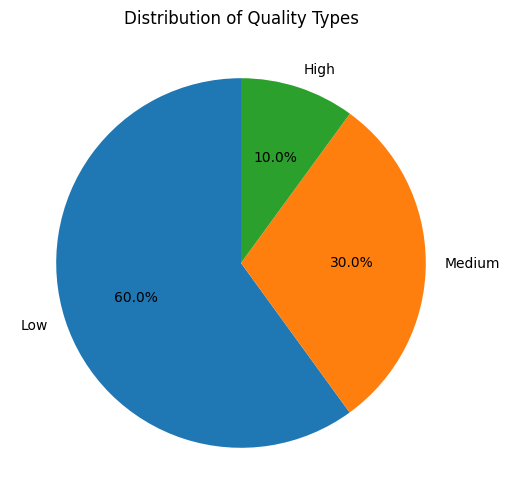

In [12]:
# visualizing Quality Types via pie chart
plt.figure(figsize=(6, 6)) 
plt.title('Distribution of Quality Types') 
plt.pie([low, med, high], labels=['Low', 'Medium', 'High'], autopct='%1.1f%%', startangle=90)
plt.show()

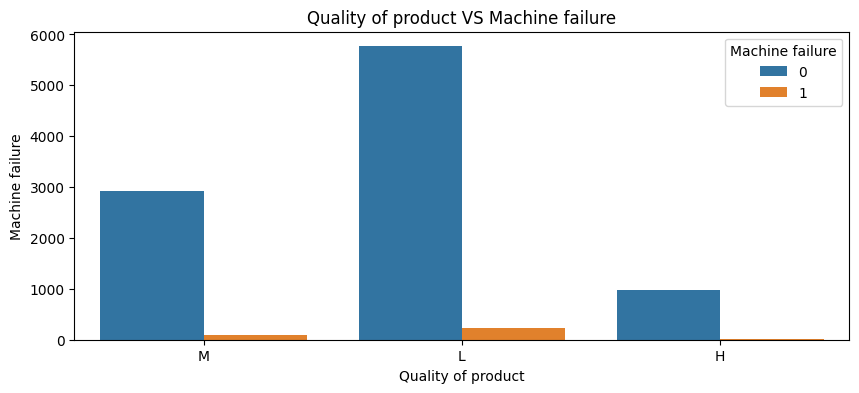

In [13]:
# visualizing Machine failure based on product Quality
plt.figure(figsize=(10, 4))
sns.countplot(data=data, x='Type', hue='Machine failure')
plt.title('Quality of product VS Machine failure')
plt.xlabel('Quality of product')
plt.ylabel('Machine failure')
plt.show()

In [14]:
# exploring target variable
zero, one = data['Machine failure'].value_counts()
print(f"Machine failure: {one}\nNo Machine failure: {zero}")

Machine failure: 339
No Machine failure: 9661


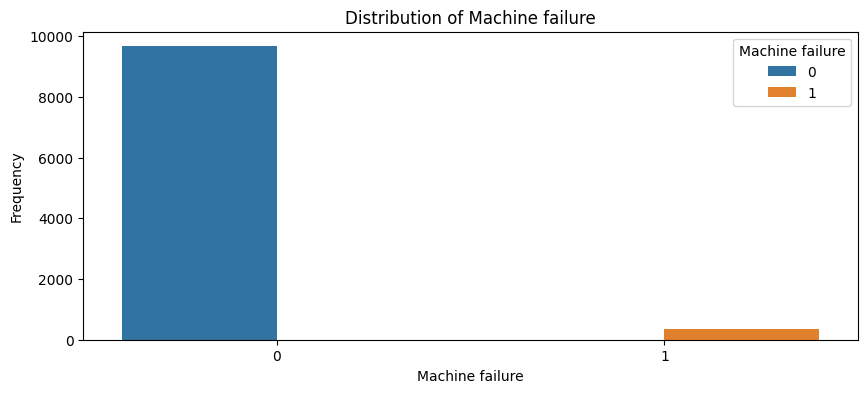

In [15]:
# visualizing target variable(Machine failure)
plt.figure(figsize=(10, 4))
sns.countplot(x='Machine failure', data=data, hue='Machine failure')
plt.title("Distribution of Machine failure")
plt.xlabel("Machine failure")
plt.ylabel("Frequency")
plt.show()

In [16]:
# five type of failure mode
failure5 = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
data[failure5].head(5)

,TWF,HDF,PWF,OSF,RNF
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [17]:
# Machine failure consist 5 failure mode
data.loc[160:, failure5 + ['Machine failure']].head(10)

,TWF,HDF,PWF,OSF,RNF,Machine failure
160,0,0,0,1,0,1
161,0,0,0,1,0,1
162,0,0,0,0,0,0
163,0,0,0,0,0,0
164,0,0,0,0,0,0
165,0,0,0,0,0,0
166,0,0,0,0,0,0
167,0,0,0,0,0,0
168,0,0,1,0,0,1
169,0,0,0,0,0,0


##### In these 5 mode of failures, if there's one or more than one of the mode consist failure(1) then Machine failure will be happened. Here we can see in 160, 161 and 168 rows has Machine failure. Total **Machine failure in DataSet : 339**

In [18]:
# checking which failure mode is common
twf = data[data.TWF == 1].value_counts().sum() 
hdf = data[data.HDF == 1].value_counts().sum() 
pwf = data[data.PWF == 1].value_counts().sum() 
osf = data[data.OSF == 1].value_counts().sum() 
rnf = data[data.RNF == 1].value_counts().sum()
print(f"TWF: {twf}\nHDF: {hdf}\nPWF: {pwf}\nOSF: {osf}\nRNF: {rnf}") 

TWF: 46
HDF: 115
PWF: 95
OSF: 98
RNF: 19


**HDF(115) < OSF(98) < PWF(95) < TWF(46) < RNF(19)**

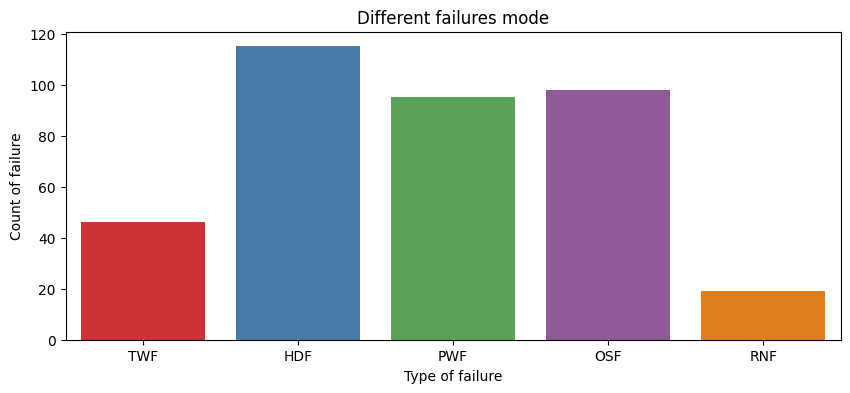

In [19]:
# visualizing the failure mode
df5 = data[['TWF', 'HDF', 'PWF', 'OSF', 'RNF']]
countf = df5.sum()
plt.figure(figsize=(10, 4))
plt.title('Different failures mode')
plt.xlabel('Type of failure')
plt.ylabel('Count of failure')
sns.barplot(x=countf.index, y=countf.values, errorbar=None, palette="Set1")
plt.show()

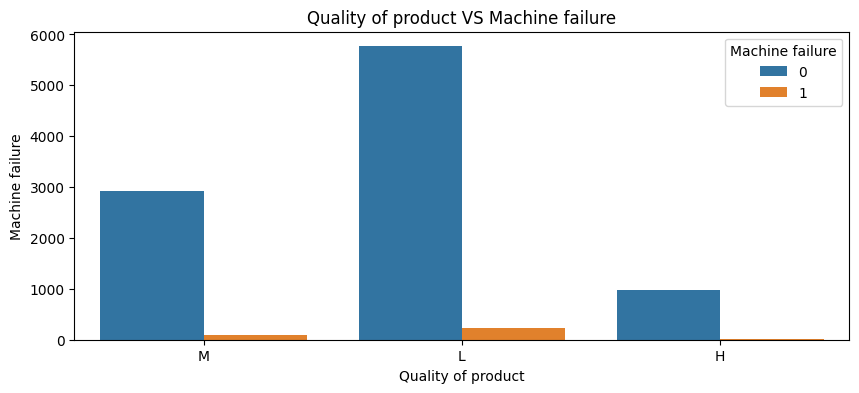

In [20]:
# visualizing Machine failure based on product Quality
plt.figure(figsize=(10, 4))
sns.countplot(data=data, x='Type', hue='Machine failure')
plt.title('Quality of product VS Machine failure')
plt.xlabel('Quality of product')
plt.ylabel('Machine failure')
plt.show()

## PreProcessing The Dataset

In [21]:
# making a new dataframe (data) by copying original one
df = data.copy()
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [22]:
# checking the data types of each variable
df.dtypes

UDI                          int64
Product ID                  object
Type                        object
Air temperature [K]        float64
Process temperature [K]    float64
Rotational speed [rpm]       int64
Torque [Nm]                float64
Tool wear [min]              int64
Machine failure              int64
TWF                          int64
HDF                          int64
PWF                          int64
OSF                          int64
RNF                          int64
dtype: object

##### We can drop **Product ID** containing **(L, M, H)** followed by numbers as We have **Type** column containing the same quality type **(L, M, H)**

In [23]:
# converting object into numeric by label encoding
label_encoder = LabelEncoder()
df['PType'] = label_encoder.fit_transform(df['Type'])
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,PType
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,2
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,1
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,1
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,1
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,1


In [24]:
# checking new value for Type after encoding
encoded_l = df.loc[df['Type'] == 'L', 'PType'].iloc[0]
encoded_m = df.loc[df['Type'] == 'M', 'PType'].iloc[0]
encoded_h = df.loc[df['Type'] == 'H', 'PType'].iloc[0]
print(f"L: {encoded_l}\nM: {encoded_m}\nH: {encoded_h}")

L: 1
M: 2
H: 0


In [25]:
# dropping some features: UID, Type and Product ID
df = df.drop(['UDI', 'Type', 'Product ID'], axis=1)
df.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF,PType
0,298.1,308.6,1551,42.8,0,0,0,0,0,0,0,2
1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0,1
2,298.1,308.5,1498,49.4,5,0,0,0,0,0,0,1
3,298.2,308.6,1433,39.5,7,0,0,0,0,0,0,1
4,298.2,308.7,1408,40.0,9,0,0,0,0,0,0,1


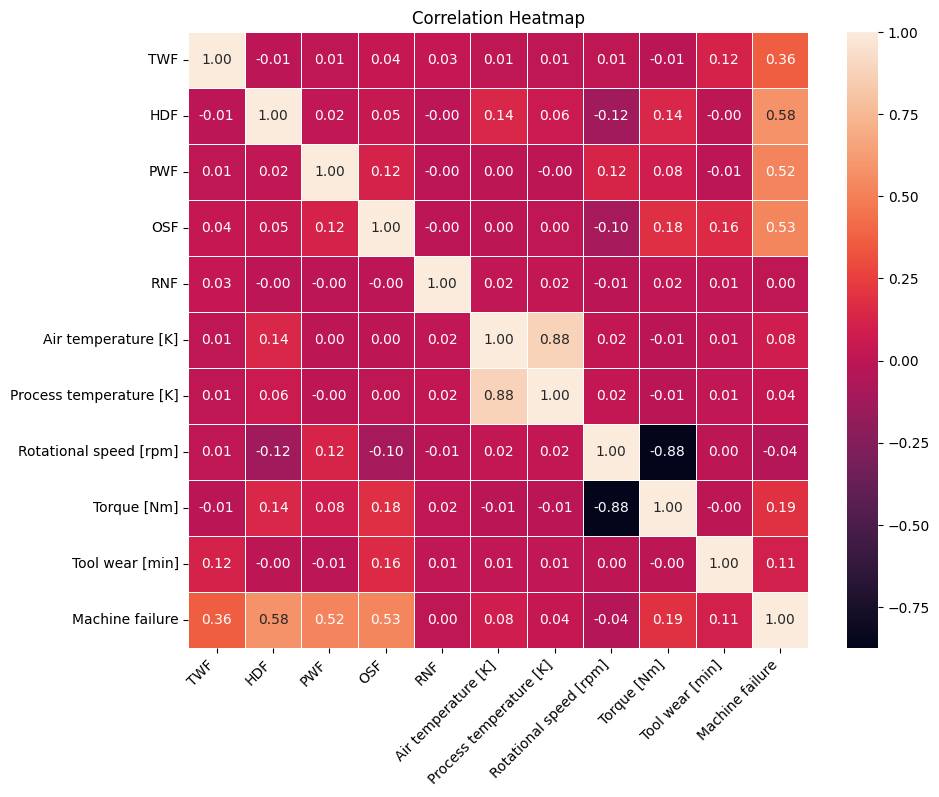

In [26]:
# determining the correlation between the other features and Machine failure via Heatmap
plt.figure(figsize=(10, 8))
heatmap_data = df[['TWF', 'HDF', 'PWF', 'OSF', 'RNF', 'Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Machine failure']]
correlation_matrix = heatmap_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='rocket', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45, ha='right')
plt.show()

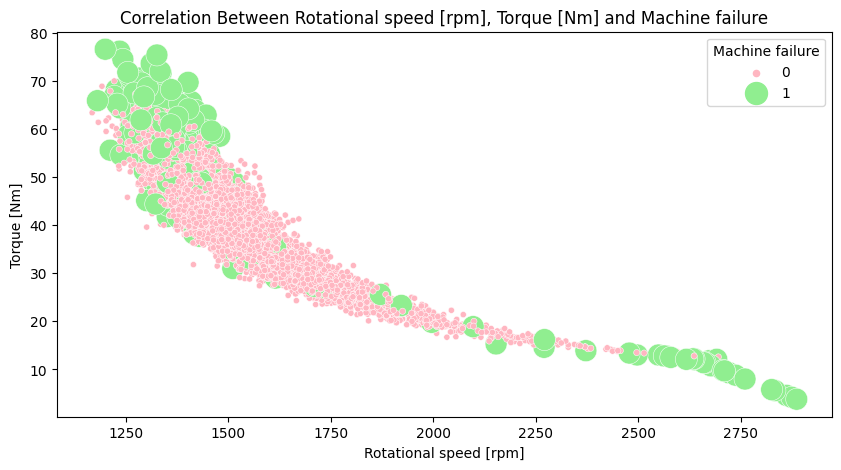

In [27]:
# determining the correlation between the Rotational speed [rpm], Torque [Nm] and Machine failure

plt.figure(figsize=(10, 5))
sns.scatterplot(x='Rotational speed [rpm]', y='Torque [Nm]', hue='Machine failure', palette=['lightpink', 'lightgreen'], data=df, size='Machine failure', sizes=(250, 20))
plt.title('Correlation Between Rotational speed [rpm], Torque [Nm] and Machine failure')
plt.xlabel('Rotational speed [rpm]')
plt.ylabel('Torque [Nm]')
plt.show()

##### From the above graph, we can Analyze
##### Most **Machine failure** occurs When **Torque [Nm]** value is **high** and **Rotational speed [rpm]** is also **high.**

## splitting the data set into test and train

In [28]:
# test and train
X = df.drop('Machine failure', axis=1)
y = df['Machine failure']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8000, 11) (2000, 11) (8000,) (2000,)


In [29]:
# making a dictionary containing different model initializations
models = {
    'Logistic Regression' : LogisticRegression(max_iter=1000),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'Support Vector Machine' : SVC()
}

In [30]:
# training and evaluating the accuracy of models
result = {}
yprediction=[]
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    yprediction.append(y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    result[name] = accuracy

In [31]:
# printing the result
for name, accuracy in result.items():
    print(f"{name} : {accuracy}")

Logistic Regression : 0.999
Decision Tree : 0.998
Random Forest : 0.999
Support Vector Machine : 0.9695


##### **Performance of different ML models (High to Low)**
##### Logistic Regression(**0.999**) **=** Random Forest(**0.999**) **>** Decision Tree(**0.997**) **>** Support Vector Machine(**0.9695**)

## visualizing the model performance

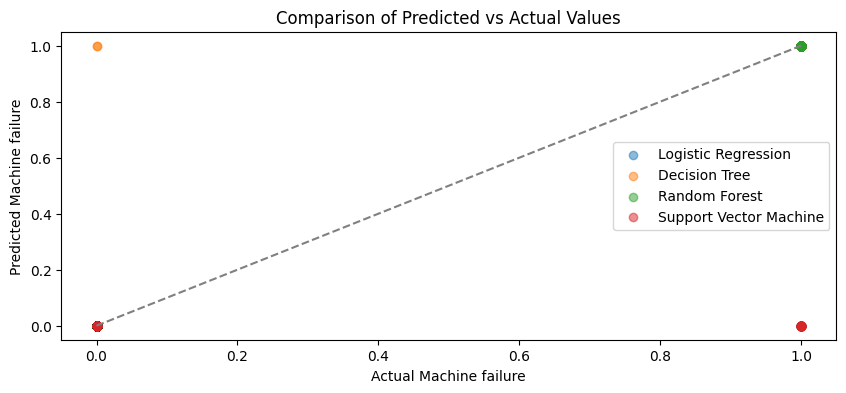

In [32]:
# scatterplot for each model
plt.figure(figsize=(10, 4))
plt.xlabel('Actual Machine failure')
plt.ylabel('Predicted Machine failure')
plt.title('Comparison of Predicted vs Actual Values')
for i, model_name in enumerate(models.keys()):
    plt.scatter(y_test, yprediction[i], label=model_name, alpha=0.5)
# diagonal line 
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='gray')
plt.legend()
plt.show()

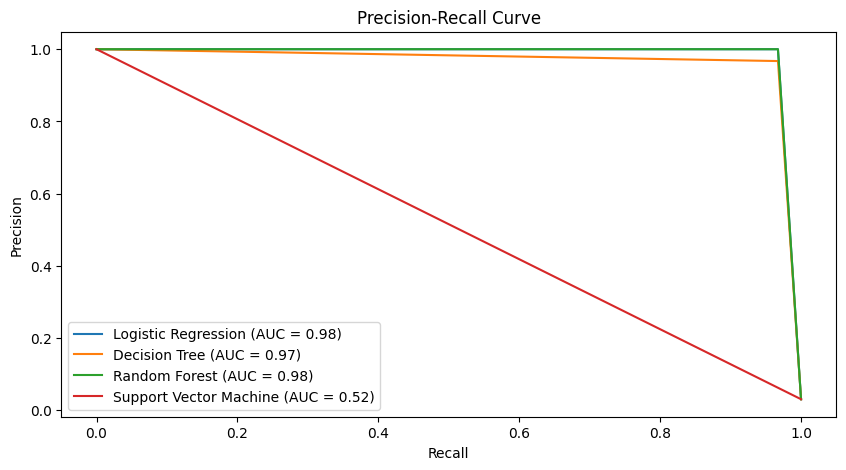

In [33]:
# precision-recall curve for each model
plt.figure(figsize=(10, 5))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
for i, model_name in enumerate(models.keys()):
    precision, recall, _ = precision_recall_curve(y_test, yprediction[i])
    pr_auc = auc(recall, precision)
    plt.plot(recall, precision, label=f'{model_name} (AUC = {pr_auc:.2f})')
plt.legend()
plt.show()

## Project Done